In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
path = '/gdrive/MyDrive/orl_faces'

(112, 92)


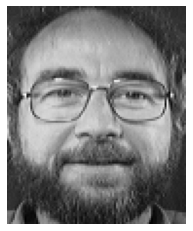

In [ ]:
# access the single image from the dataset
import matplotlib.image as mimg 
import numpy as np 
import matplotlib.pyplot as plt
user=28
sample=5
path = '/gdrive/MyDrive/orl_faces/u(%d)/%d.png'%(user,sample)

im = mimg.imread(path)
plt.imshow(im,cmap='gray')
plt.axis('off')
print(im.shape)


In [ ]:
# access the whole dataset 
# all images are needs to be stacked up in a 
# numpy 3-D matrix (samples,x,y) x=112,y = 92 , smaples=400
# numpy matrix for target (samples) sample= 400

image = np.zeros((400,112,92))
target = np.zeros((400)) 

count = 0
for i in range(1,41,1):
  for j in range(1,11,1):

    user=i
    sample=j
    path = '/gdrive/MyDrive/orl_faces/u(%d)/%d.png'%(user,sample)

    im = mimg.imread(path)
    image[count,:,:]=im
    target[count]=user-1 # the labels should start from 0
    count=count+1

    #plt.imshow(im,cmap='gray')
    #plt.axis('off')
  print("User Number:",user,"is processed")
    #plt.pause(0.5)

User Number: 1 is processed
User Number: 2 is processed
User Number: 3 is processed
User Number: 4 is processed
User Number: 5 is processed
User Number: 6 is processed
User Number: 7 is processed
User Number: 8 is processed
User Number: 9 is processed
User Number: 10 is processed
User Number: 11 is processed
User Number: 12 is processed
User Number: 13 is processed
User Number: 14 is processed
User Number: 15 is processed
User Number: 16 is processed
User Number: 17 is processed
User Number: 18 is processed
User Number: 19 is processed
User Number: 20 is processed
User Number: 21 is processed
User Number: 22 is processed
User Number: 23 is processed
User Number: 24 is processed
User Number: 25 is processed
User Number: 26 is processed
User Number: 27 is processed
User Number: 28 is processed
User Number: 29 is processed
User Number: 30 is processed
User Number: 31 is processed
User Number: 32 is processed
User Number: 33 is processed
User Number: 34 is processed
User Number: 35 is proc

In [ ]:
from sklearn import model_selection 
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(image,target,test_size=0.3,
                                                             random_state=10)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(280, 112, 92) (280,)
(120, 112, 92) (120,)


In [ ]:
from tensorflow import keras 

#lets create the neural network 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(112,92,1))) # input layer
model.add(keras.layers.Dense(250,activation = 'softmax')) # hidden layer 1
model.add(keras.layers.Dense(150,activation = 'softmax')) # hidden layer 2
model.add(keras.layers.Dense(300,activation = 'softmax')) # hidden layer 3
model.add(keras.layers.Dense(40)) # output 


model.compile(optimizer='adam',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 10304)             0         
                                                                 
 dense_20 (Dense)            (None, 250)               2576250   
                                                                 
 dense_21 (Dense)            (None, 150)               37650     
                                                                 
 dense_22 (Dense)            (None, 300)               45300     
                                                                 
 dense_23 (Dense)            (None, 40)                12040     
                                                                 
Total params: 2,671,240
Trainable params: 2,671,240
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(Xtrain,ytrain,epochs=100,validation_data=(Xtest,ytest))

Epoch 1/100
9/9 [==============================] - 1s 46ms/step - loss: 3.6894 - Accuracy: 0.0107 - val_loss: 3.6906 - val_Accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 25ms/step - loss: 3.6883 - Accuracy: 0.0357 - val_loss: 3.6915 - val_Accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 25ms/step - loss: 3.6879 - Accuracy: 0.0357 - val_loss: 3.6928 - val_Accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 29ms/step - loss: 3.6874 - Accuracy: 0.0357 - val_loss: 3.6941 - val_Accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 26ms/step - loss: 3.6869 - Accuracy: 0.0357 - val_loss: 3.6951 - val_Accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 25ms/step - loss: 3.6865 - Accuracy: 0.0357 - val_loss: 3.6962 - val_Accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 25ms/step - loss: 3.6861 - Accuracy: 0.0357 - val_loss: 3.6973 - val_Accuracy: 0.0

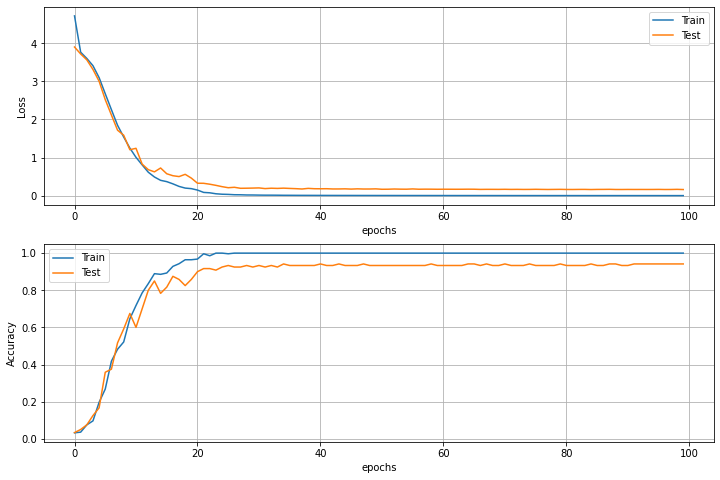

In [ ]:
plt.figure(1,(12,8))
plt.subplot(2,1,1)
plt.plot(hist.epoch,hist.history['loss'],label='Train')
plt.plot(hist.epoch,hist.history['val_loss'],label='Test')
plt.legend()
plt.grid('on')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.subplot(2,1,2)
plt.plot(hist.epoch,hist.history['Accuracy'],label='Train')
plt.plot(hist.epoch,hist.history['val_Accuracy'],label='Test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid('on')